In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [107]:
# Set random seed for reproducibility
np.random.seed(42)

In [108]:
# Load the Alzheimer’s Disease Dataset
alzheimers_data = pd.read_csv("alzheimers_disease_data.csv")

In [109]:
alzheimers_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [110]:
# Check for missing values and data types
print("\nDataset Info:")
print(alzheimers_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 n

In [111]:
# Drop irrelevant columns (e.g., PatientID, DoctorInCharge)
alzheimers_data = alzheimers_data.drop(columns=['PatientID', 'DoctorInCharge'])

In [112]:
# Check for missing values
print("\nMissing Values:")
print(alzheimers_data.isnull().sum())


Missing Values:
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness         

In [113]:
# Define features (X) and target (y)
X = alzheimers_data.drop(columns=['Diagnosis'])  # Features
y = alzheimers_data['Diagnosis']  # Target (0 = No Alzheimer’s, 1 = Alzheimer’s)

In [114]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Define hyperparameter grid for max_depth and min_samples_split
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20]  # Testing different values for min_samples_split
}

# Initialize lists to store performance metrics
results = []

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    depth = params['max_depth']
    min_split = params['min_samples_split']

    # Initialize the Decision Tree Classifier
    dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, random_state=42)

    # Train the model
    dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results.append({
        'max_depth': depth,
        'min_samples_split': min_split,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    })

    print(f"\nDepth = {depth}, Min Samples Split = {min_split}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Depth = 3, Min Samples Split = 2:
Accuracy: 0.87
Precision: 0.91
Recall: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       277
           1       0.91      0.69      0.79       153

    accuracy                           0.87       430
   macro avg       0.88      0.83      0.85       430
weighted avg       0.87      0.87      0.86       430


Depth = 3, Min Samples Split = 10:
Accuracy: 0.87
Precision: 0.91
Recall: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       277
           1       0.91      0.69      0.79       153

    accuracy                           0.87       430
   macro avg       0.88      0.83      0.85       430
weighted avg       0.87      0.87      0.86       430


Depth = 3, Min Samples Split = 20:
Accuracy: 0.87
Precision: 0.91
Recall: 0.69
Classification Report:
              precision    recall  f1-

In [116]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df.head(9)

,max_depth,min_samples_split,accuracy,precision,recall
0,3,2,0.867442,0.913793,0.692810
1,3,10,0.867442,0.913793,0.692810
2,3,20,0.867442,0.913793,0.692810
3,5,2,0.927907,0.923611,0.869281
4,5,10,0.927907,0.923611,0.869281
5,5,20,0.923256,0.910959,0.869281
6,10,2,0.916279,0.914894,0.843137
7,10,10,0.909302,0.913043,0.823529
8,10,20,0.902326,0.899281,0.816993


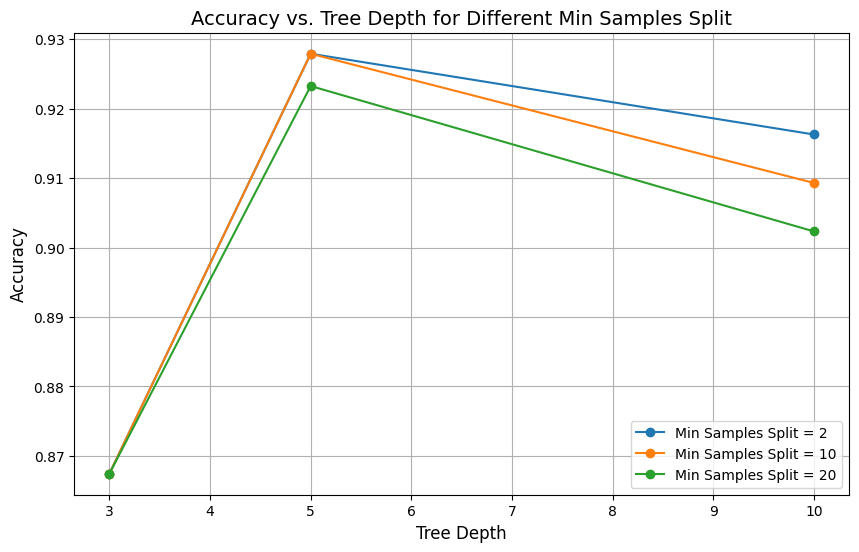

In [117]:
# Plot 1: Accuracy vs. Tree Depth for different Min Samples Split
plt.figure(figsize=(10, 6))
for min_split in param_grid['min_samples_split']:
    subset = results_df[results_df['min_samples_split'] == min_split]
    plt.plot(subset['max_depth'], subset['accuracy'], marker='o',
             label=f'Min Samples Split = {min_split}')
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs. Tree Depth for Different Min Samples Split', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

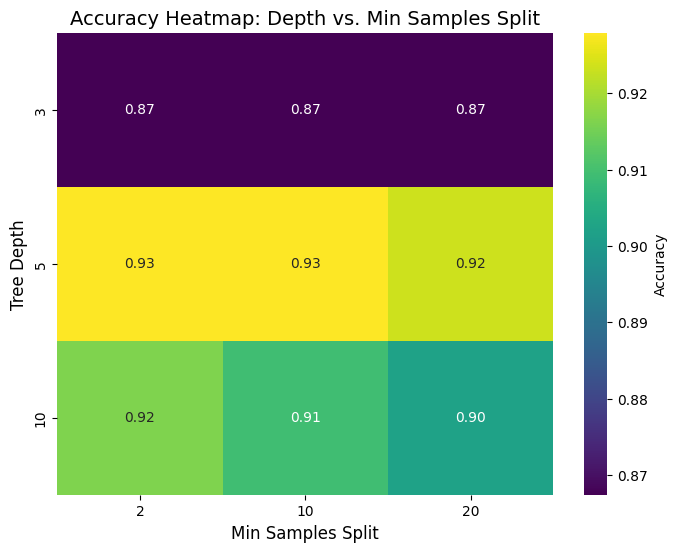

In [118]:
# Plot 2: Heatmap of Accuracy for Depth and Min Samples Split
pivot_table = results_df.pivot(index='max_depth', columns='min_samples_split', values='accuracy')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='viridis', cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Heatmap: Depth vs. Min Samples Split', fontsize=14)
plt.xlabel('Min Samples Split', fontsize=12)
plt.ylabel('Tree Depth', fontsize=12)
plt.show()

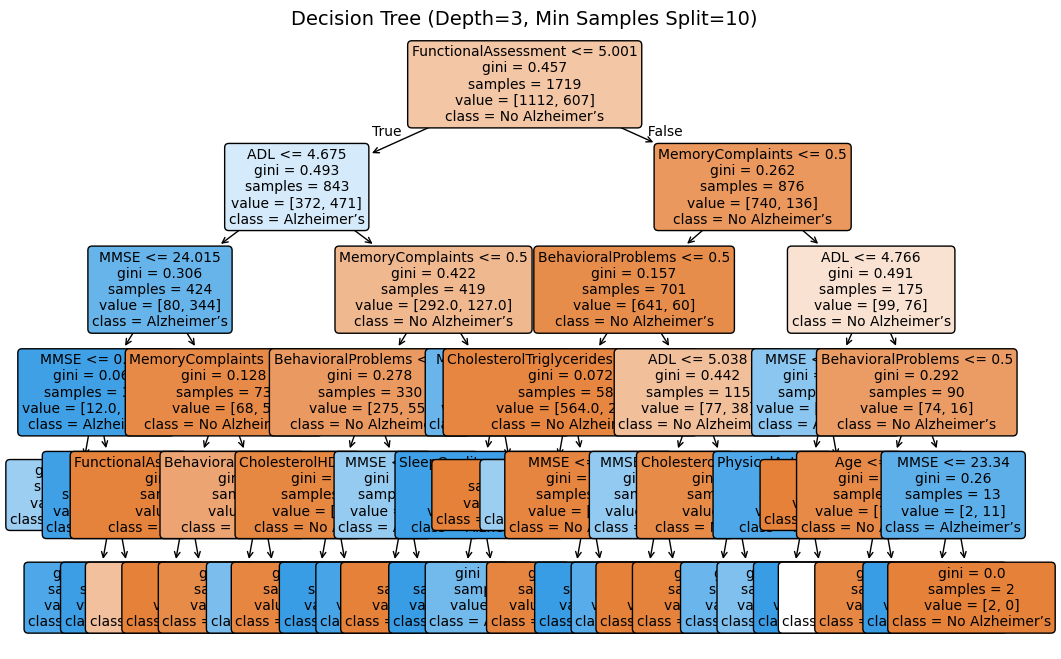

In [119]:
# Plot 3: Visualize a Decision Tree (depth=3, min_samples_split=10 for simplicity)
dt_model_depth3 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_depth3.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt_model_depth3, feature_names=X.columns, class_names=['No Alzheimer’s', 'Alzheimer’s'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree (Depth=3, Min Samples Split=10)', fontsize=14)
plt.show()

<ipython-input-120-d8aad4051691>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


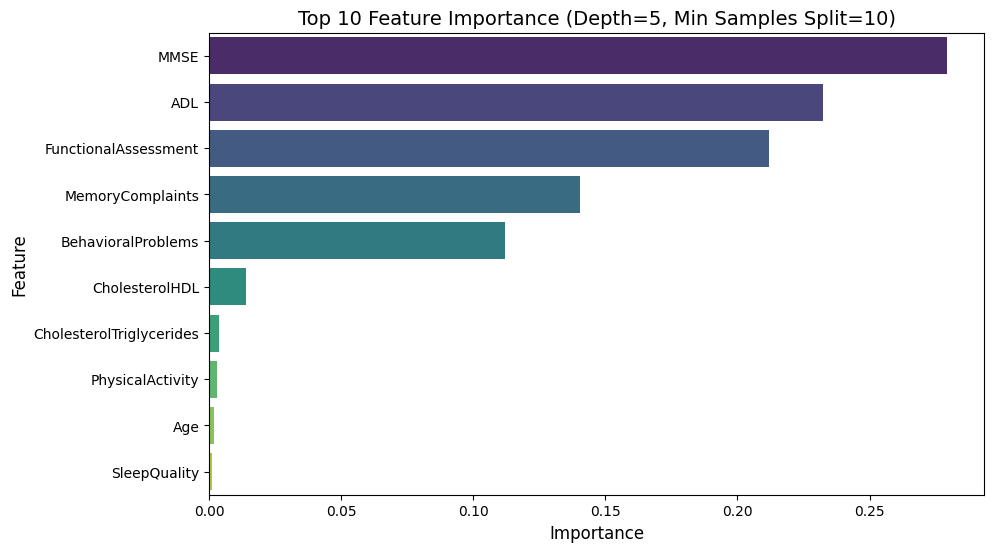

In [120]:
# Feature Importance (for depth=5, min_samples_split=10 model)
dt_model_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_depth5.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model_depth5.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (Depth=5, Min Samples Split=10)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()